# Lab 2 - Feature Generation, Feature Extraction & Feature Selection

This is a project group assignment.

**Due: Monday, February 24, 11:59 PM**

## Grading Rubric

1. **Problem 1 (20 pts)**
    * **Additional training (0 pts):** If you decide to use more training samples, you can include them in this lab.
    
    * **Training data discussion (20 pts):** your discussion includes all the listed topics.
    
2. **Problem 2 (30 pts)** 
    * **Image transformation (15 pts):** you've transformed the training data, discussed advantages/disadvantages on the transformation and displayed a few samples.
    
    * **Image normalization (15 pts):** you've normalized the training data, discussed advantages/disadvantages on the normalization and displayed a few samples.

3. **Problem 3 (50 pts)**
    * **Feature Generators (20 pts):** you've generated features using PCA and HOG.
    
    * **Cluster-validity metrics (20 pts):** you've implemented the quality metrics for each feature descriptor.

    * **Feature Discussion (10 pts):** you've provided a discussion about feature quality. This discussion should use your plotting schemes and the results from quality metrics.
    
**Total: 100 pts**

# Feature Extraction & Feature Selection

The objective of Lab 2 is to introduce to the importance of pre-processing, normalization, feature generation, feature extraction and feature selection. You will develop, implement and compare several pre-processing pipelines on the collected project data sets. You will also implement feature visualization scripts and cluster validity-type metrics to aid in your pre-processing evaluation and visualization.

**You can use ```scikit-learn``` modules.**

**Objectives**

By completing this assignment you will practice and master the following skills:

* Image pre-processing for object classification
* Different types of normalization
* Feature Generation for image analysis
* Feature Extraction & Feature Selection
* Visualization and quality assessment of features

**Create your Repo**

You can create the repo for this assignment by visiting the following link: https://classroom.github.com/g/eQXPcRix

# Training Data Set

The training data set was collected from the entire class of EEL 4930. The training set contains 1844 samples of $100\times 100$ RGB images. 
* You can download both the training data set (**"train_data.npy"**) and training labels (**"train_labels.npy"**) from our Canvas page [here](https://ufl.instructure.com/courses/395133/files/folder/Project%20Data).

The test data set will not be available until the end of the semester. It will have the same format as the training set.

Let's plot some sample images:

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.color import rgb2gray
import skimage.io as skimg
import skimage.color as color
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.metrics as metrics
from skimage.feature import hog


In [2]:
Xtrain = np.load('train_data.npy')
ytrain = np.load('train_labels.npy')

Xtrain.shape, ytrain.shape

((1844, 100, 100, 3), (1844, 1))

In [3]:
np.ravel(Xtrain, order="A")

array([161, 155, 149, ..., 129, 120, 103], dtype=uint8)

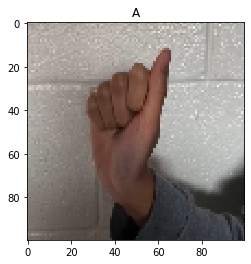

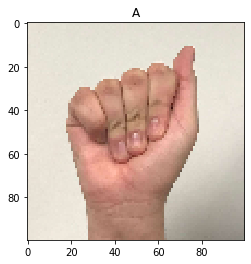

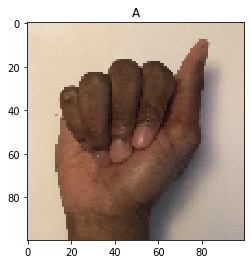

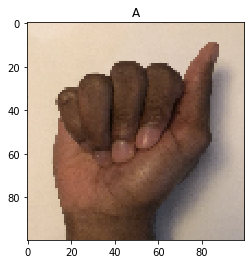

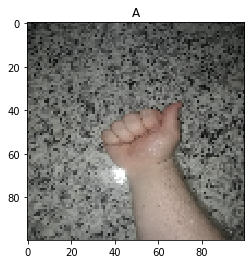

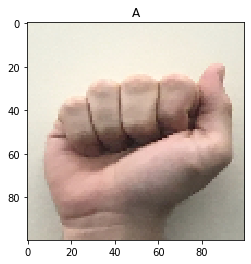

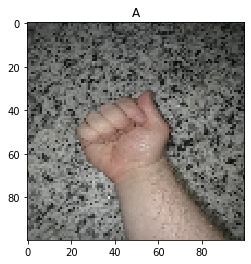

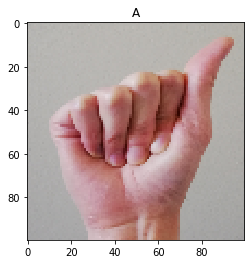

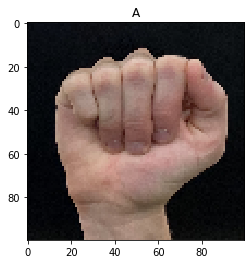

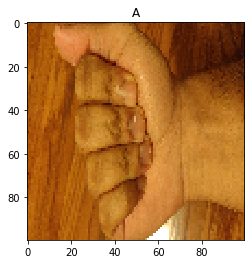

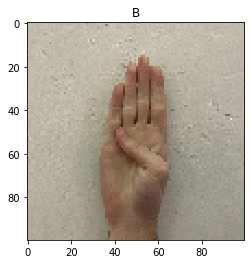

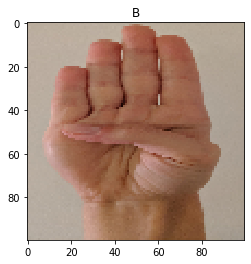

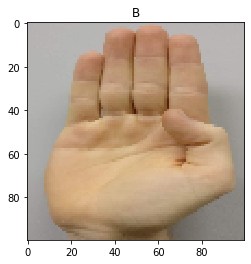

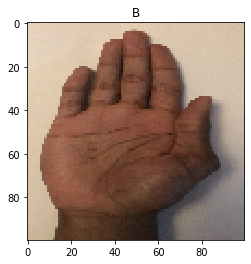

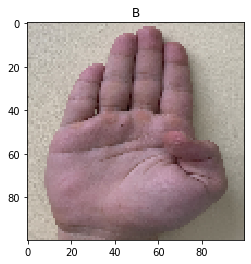

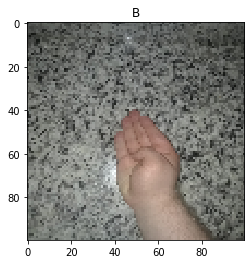

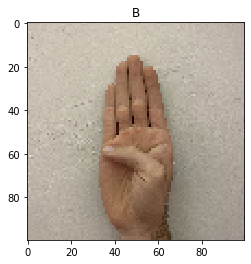

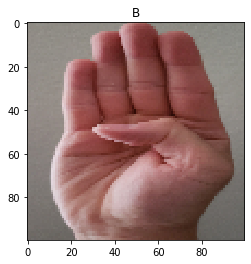

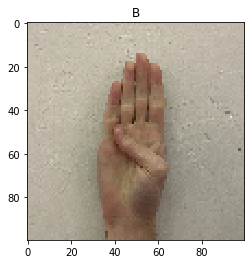

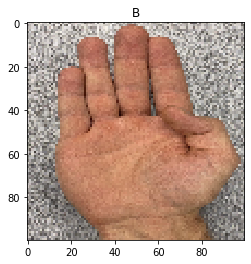

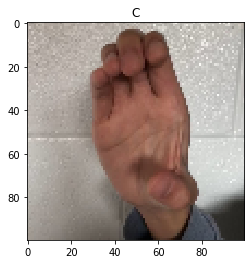

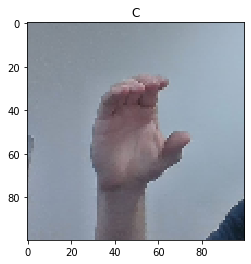

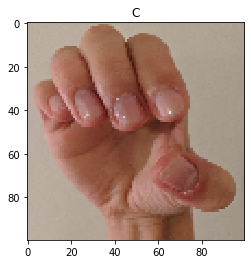

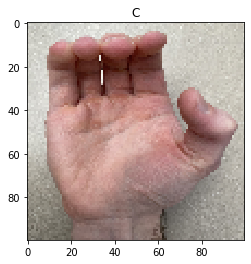

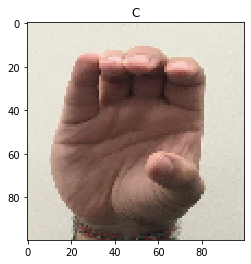

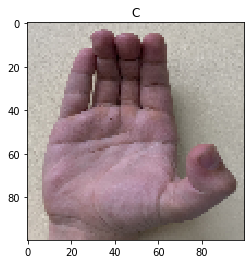

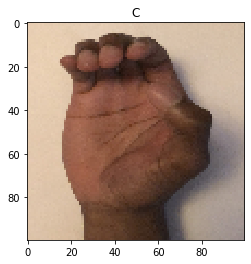

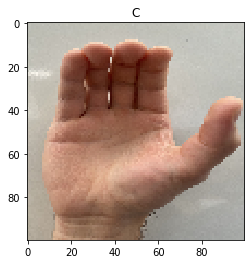

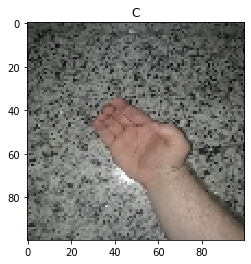

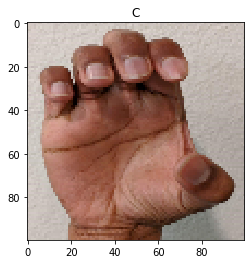

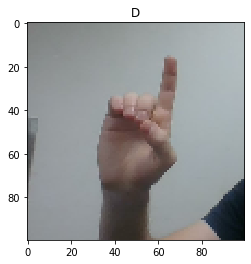

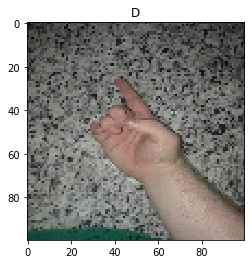

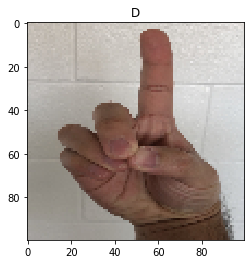

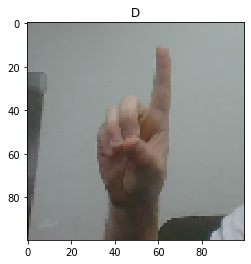

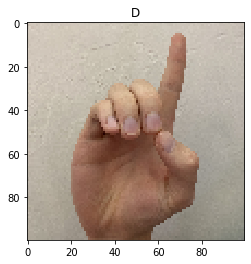

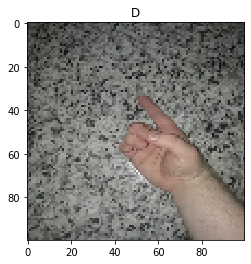

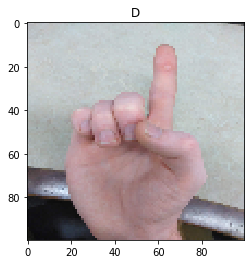

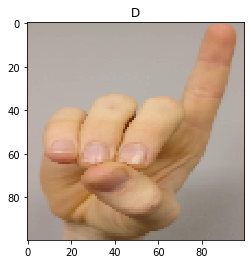

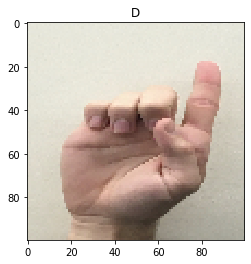

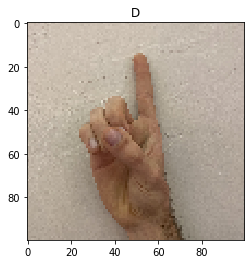

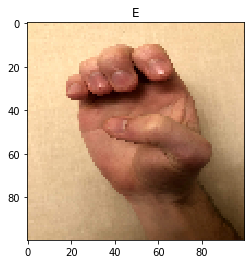

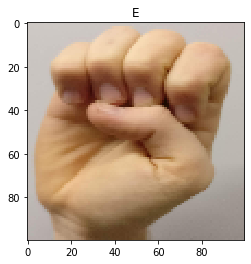

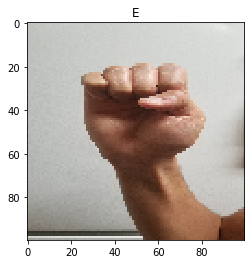

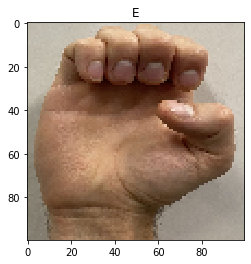

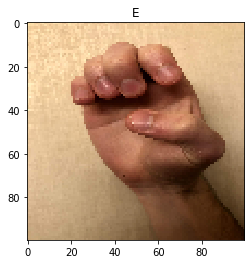

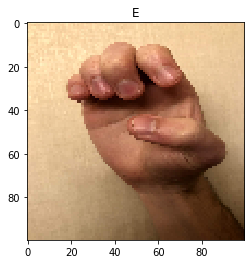

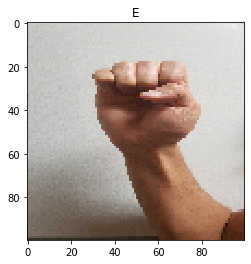

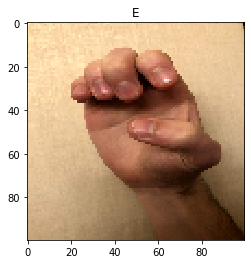

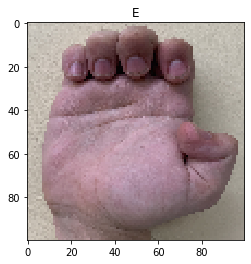

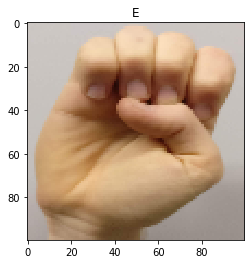

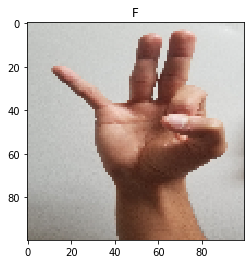

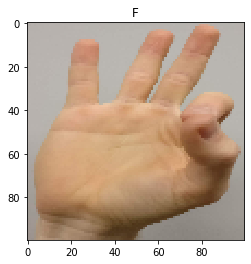

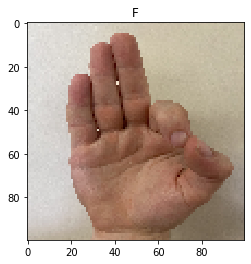

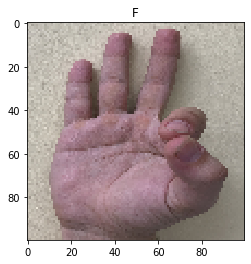

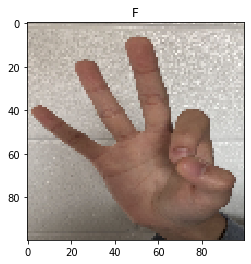

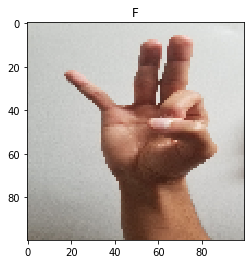

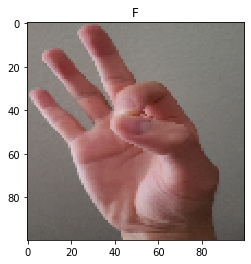

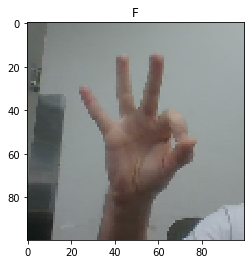

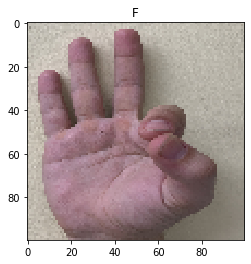

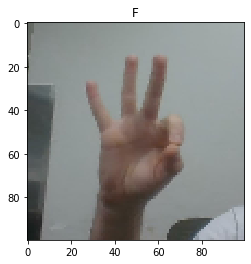

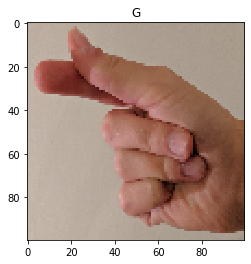

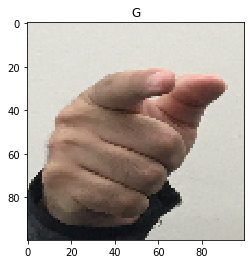

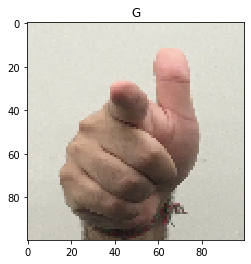

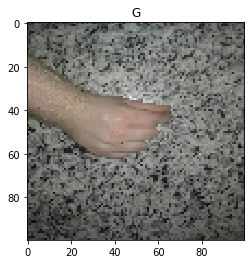

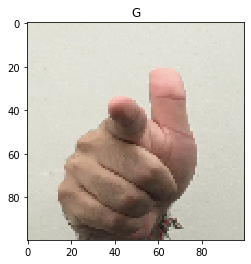

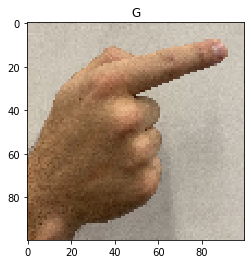

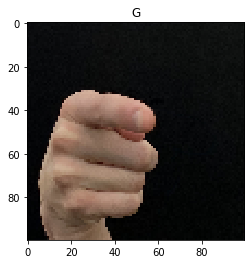

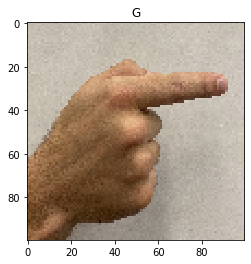

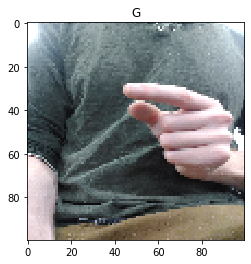

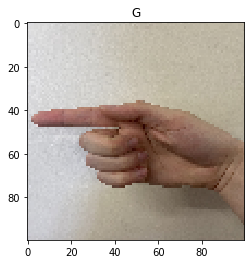

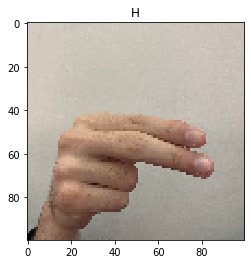

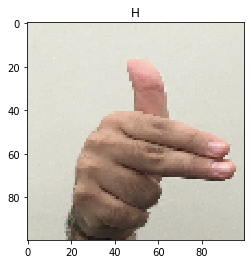

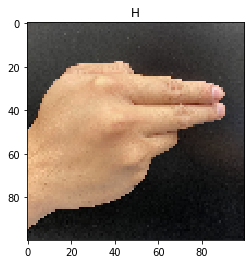

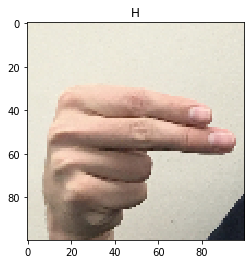

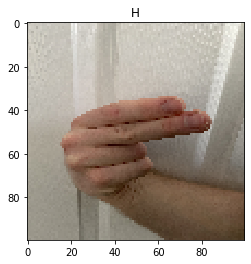

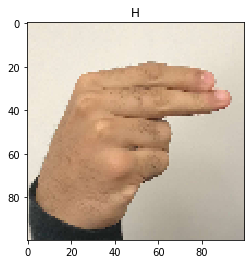

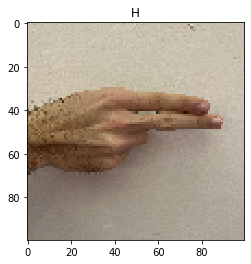

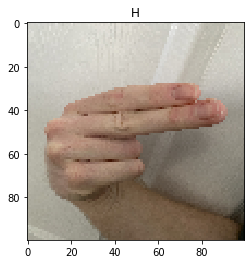

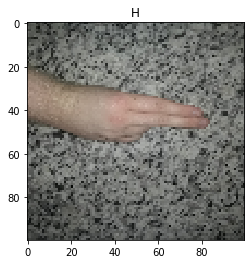

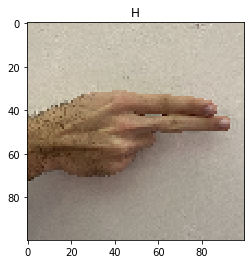

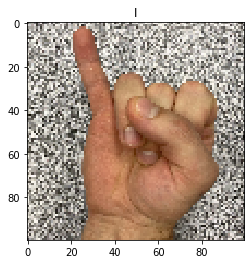

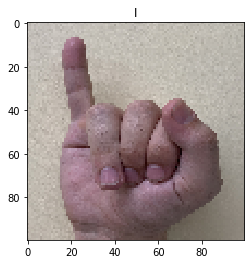

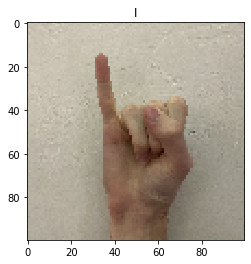

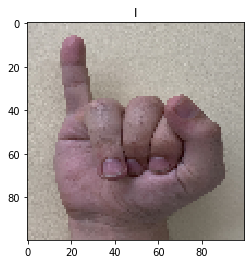

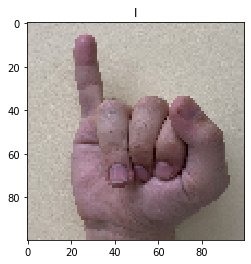

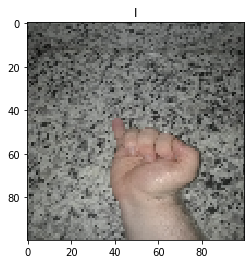

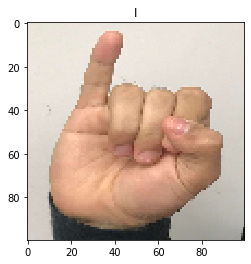

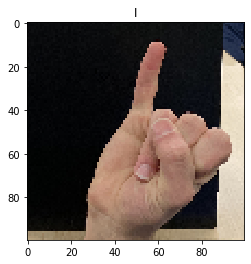

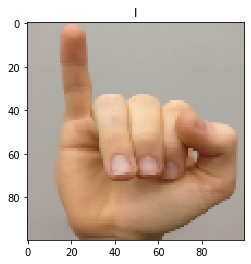

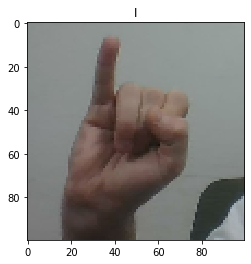

In [4]:
# Displaying a few Training Samples
labels = ['A','B','C','D','E','F','G','H','I']

for j in range(len(labels)):
    idx = list(np.where(ytrain == labels[j])[0])
    random.shuffle(idx)
    # Only displaying 10 random samples for each character
    for k in range(10):
        plt.imshow(Xtrain[idx[k],:,:,:]);
        plt.title(ytrain[idx[k]][0])
        plt.show();

# Problem 1

Provide a discussion about the quality of the training data set. Your discussion should include: 

1. Number of training samples per class
2. Dimensionality of feature space
3. Class representation (whether there is more than one dominant signing hand, alignment of signing hand, background, etc.)

This discussion may also include any *data impressions* that you may want to test in some other stage of your ML pipeline.

In [5]:
import skimage.color as color

In [6]:
for j in range(len(labels)):
    idx = list(np.where(ytrain == labels[j])[0])
    # Only displaying 10 random samples for each character
    for k in range(10):
       
        plt.imshow(color.rgb2grey( Xtrain_255_norm[idx[k],:,:,:]),cmap='gray')
        plt.title(ytrain[idx[k]][0])
        plt.show();

NameError: name 'Xtrain_255_norm' is not defined

In [ ]:
Xtrain_technique_1 = (Xtrain - Xtrain.min()) / (Xtrain.max() - Xtrain.min()) 

In [ ]:
for j in range(len(labels)):
    idx = list(np.where(ytrain == labels[j])[0])
    # Only displaying 10 random samples for each character
    for k in range(10):
       
        plt.imshow(color.rgb2grey(Xtrain_technique_1[idx[k],:,:,:]),cmap='gray')
        plt.title(ytrain[idx[k]][0])
        plt.show();

In [ ]:
Xtrain_technique_2 = 2* ((Xtrain - Xtrain.min()) / (Xtrain.max() - Xtrain.min()))

In [ ]:
for j in range(len(labels)):
    idx = list(np.where(ytrain == labels[j])[0])
    # Only displaying 10 random samples for each character
    for k in range(10):
       
        plt.imshow(color.rgb2grey(Xtrain_technique_2[idx[k],:,:,:]),cmap='gray')
        plt.title(ytrain[idx[k]][0])
        plt.show();

# Problem 2

In this problem, you will implement different pre-processing and normalization techniques for the training data. They should include:

1. Transformation of RGB channels to grayscale channel. You may use the function ```rgb2gray``` from ```skimage.color```.
2. RGB color channels normalization.

For each normalization technique, you should: (1) plot a few samples, and (2) discuss the advantages of each normalization technique versus others. You should also discuss the importance of data normalization in general.

For subsequent problems, you should choose a normalization technique or (preferred) compare performance among normalization techniques.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
for j in range(len(labels)):
    idx = list(np.where(ytrain == labels[j])[0])
    random.shuffle(idx)
    # Only displaying 10 random samples for each character
    for k in range(10):
       
        print(color.rgb2grey(Xtrain[idx[k],:,:,:]))
      

In [ ]:
grey_images = []
for image in Xtrain_technique_1:
    grey_images +=[color.rgb2grey(image).ravel()]

In [ ]:
pca_data = dict()
pca = PCA()
pca_data = pca.fit_transform(grey_images)
print(pca.explained_variance_ratio_)

In [ ]:
pca_data.shape

In [ ]:
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)
plt.plot(cum_var_explained)
plt.grid()
plt.xlabel('N Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

for j in range(len(labels)):
    idx = list(np.where(ytrain == labels[j])[0])
    random.shuffle(idx)
    # Only displaying 10 random samples for each character
    for k in range(99):   
        X_train_std = stdsc.fit_transform(color.rgb2grey(Xtrain[idx[k],:,:,:]))
print(stdsc.mean_)

In [ ]:
xtrain_grey = color.rgb2gray(Xtrain)

In [ ]:
fig = plt.figure(figsize=(50, 50))
hog_data_visuals = dict()
hog_data_gradients = dict()
for image in range(len(Xtrain)):
    hog_data_gradients[image], hog_data_visuals[image]= hog(color.rgb2grey(Xtrain_technique_1[image]), visualize=True)
    sub = fig.add_subplot(100, 100, image + 1)
    sub.imshow(hog_data_visuals[image])
fig.show()
      #  gradient[k], visual[k] = hog(color.rgb2grey(Xtrain_technique_2[idx[k],:,:,:]), visualize=True, multichannel=False) 
       # rescaled_visual[k] = exposure.rescale_intensity(visual[k], in_range=(0, 10))
        #plt.imshow(rescaled_visual[k])
#plt.show()

In [ ]:
plt.show()

In [ ]:
hog_data_array = np.array(list(hog_data_gradients.values()))

In [ ]:
pca.n_features_

In [ ]:
import sklearn.metrics as metrics
metrics.calinski_harabaz_score(pca_data,ytrain)

In [ ]:
metrics.davies_bouldin_score(pca_data,ytrain)

In [ ]:
metrics.silhouette_score(pca_data,ytrain)

In [ ]:
metrics.pairwise_distances(pca_data)

In [ ]:
metrics.calinski_harabaz_score(hog_data_array, ytrain)

In [ ]:
metrics.silhouette_score(hog_data_array, ytrain)

In [ ]:
metrics.pairwise_distances(hog_data_array)

In [ ]:
metrics.davies_bouldin_score(hog_data_array,ytrain)

# Problem 3

In this problem, you will generate features from the training set and assess the quality of the generated features by computing a set of cluster validity-type metrics.

You can experiment with several feature generators, but they should include:

1. PCA features on the original training set. **Provide a justification for the number of principal components you will choose.**

2. HOG features on the original training set. **Are HOG features sensitive to object orientation? Why?**

The *ideal* feature space will have class clusters far away from each other and compact class clusters. Compute the following metrics:

1. **Calinski-Harabasz Index**: The index is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared). You may use the function ```calinski_harabasz_score``` from ```sklearn.metrics```.

2. **Davies-Bouldin Index**: This index computes the average similarity between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves. You may use the function ```davies_bouldin_score``` from ```sklearn.metrics```.

3. **Silhouette Index**: The silhouette index measures how well class group cluster together it estimates the average distance between clusters. You may use the function ```silhouette_score``` from ```sklearn.metrics```. 

4. **Pairwise Euclidean Distance**: The pairwise Euclidean distance measures how far away class mean are from each other. You may use the function ```pairwise_distances``` from ```sklearn.metrics```.

Include feature visualization by using histograms or heatmap (from ```seaborn```) plots.

Provide a discussion for your findings and remember to always justification your answers.

## Submit your Solution

Along with your Jupyter Notebook answers, create a PDF of the notebook with your solutions.

As always, `add` and `commit` the final version of your work, and `push` your code to your GitHub repository.

* Submit the **URL** of your GitHub Repository as your assignment submission on Canvas (only one team member needs to do so).